In [13]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt 
from collections import Counter  
import os  
  

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score  
from sklearn.preprocessing import QuantileTransformer  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split  
from sklearn.svm import SVC  

In [9]:
data = pd.read_csv("DIABETES PRED ANALYSIS 2.csv")  
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1537 non-null   int64  
 1   Glucose                   1537 non-null   int64  
 2   BloodPressure             1537 non-null   int64  
 3   SkinThickness             1537 non-null   int64  
 4   Insulin                   1537 non-null   int64  
 5   BMI                       1537 non-null   float64
 6   DiabetesPedigreeFunction  1537 non-null   float64
 7   Age                       1537 non-null   int64  
 8   Outcome                   1537 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 108.2 KB


In [11]:
# Showing the top 5 rows of the dataset  
data.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
# Exploring the missing values in the diabetes dataset  
data.isnull().sum()  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:

data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())  
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())    
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())   
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())  
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())  
data.head() 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.748211,33.6,0.627,50,1
1,1,85,66,29.000000,79.748211,26.6,0.351,31,0
2,8,183,64,20.539362,79.748211,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


In [27]:
# Reviewing the dataset statistics  
data.describe()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,3.847105,121.620690,72.385166,26.606292,118.558661,32.446288,0.471767,33.232921,0.348731
std,3.368345,30.450394,12.088917,9.624514,93.078548,6.873122,0.331141,11.756719,0.476724
min,0.000000,44.000000,24.000000,7.000000,1.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.539362,79.748211,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.748211,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

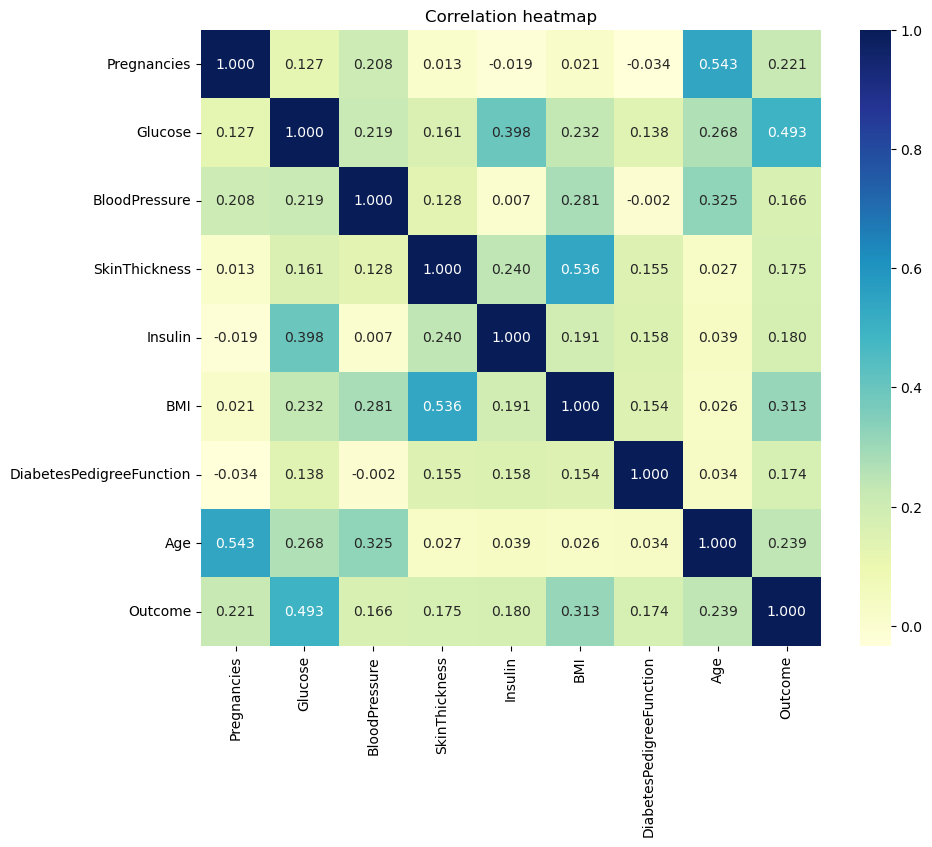

In [29]:
plt.figure(figsize = (10, 8))  
sns.heatmap(data.corr(), annot = True, fmt = ".3f", cmap = "YlGnBu")  
plt.title("Correlation heatmap")  

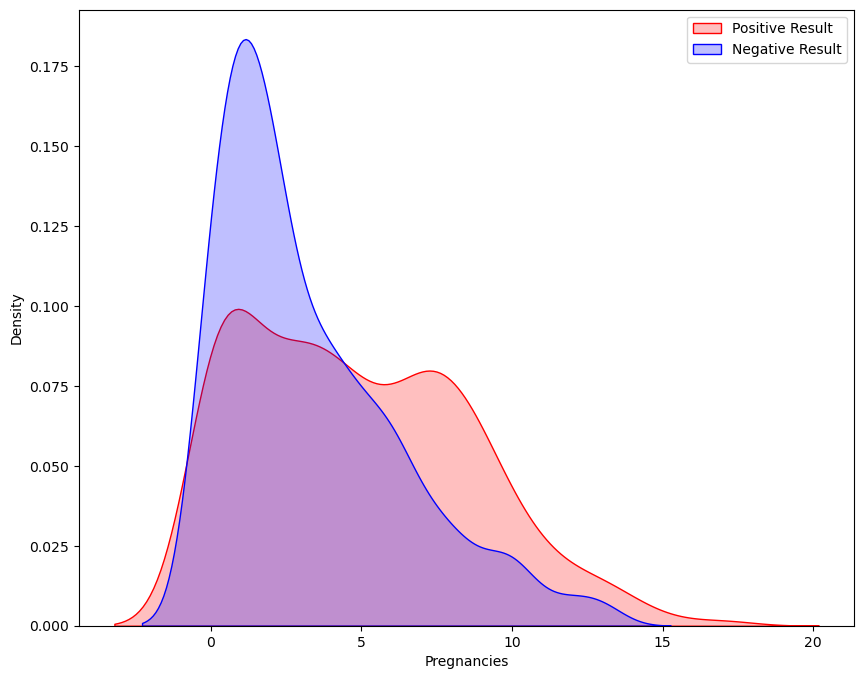

In [43]:
plt.figure(figsize = (10, 8))  
kde = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 1], color = "Red", fill = True)  
kde = sns.kdeplot(data["Pregnancies"][data["Outcome"] == 0], ax = kde, color = "Blue", fill= True)  
kde.set_xlabel("Pregnancies")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result", "Negative Result"]) 

<Axes: xlabel='Outcome', ylabel='Glucose'>

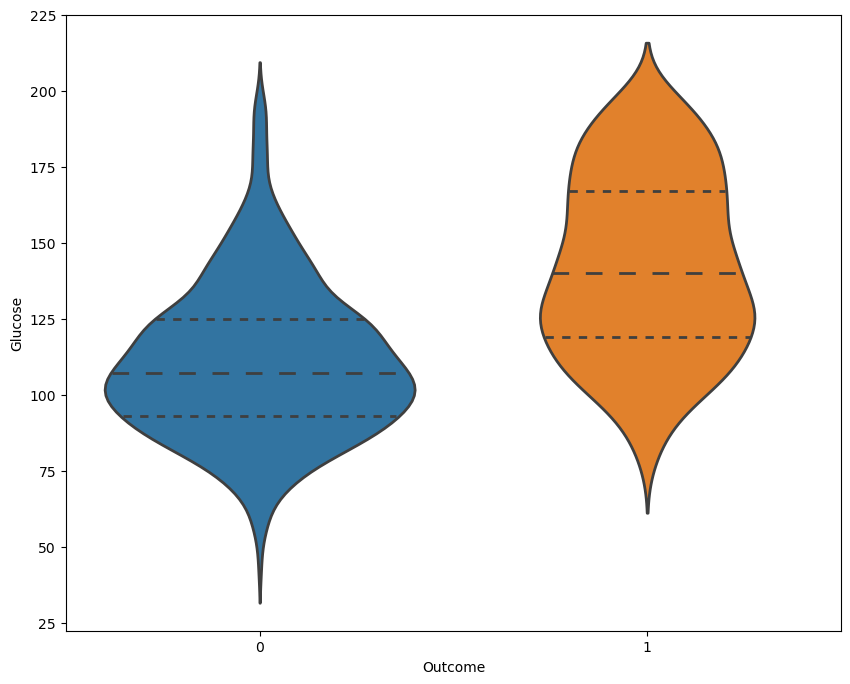

In [45]:
plt.figure(figsize = (10, 8))  
sns.violinplot(data = data, x = "Outcome", y = "Glucose",  
               split = True, inner = "quart", linewidth = 2)  


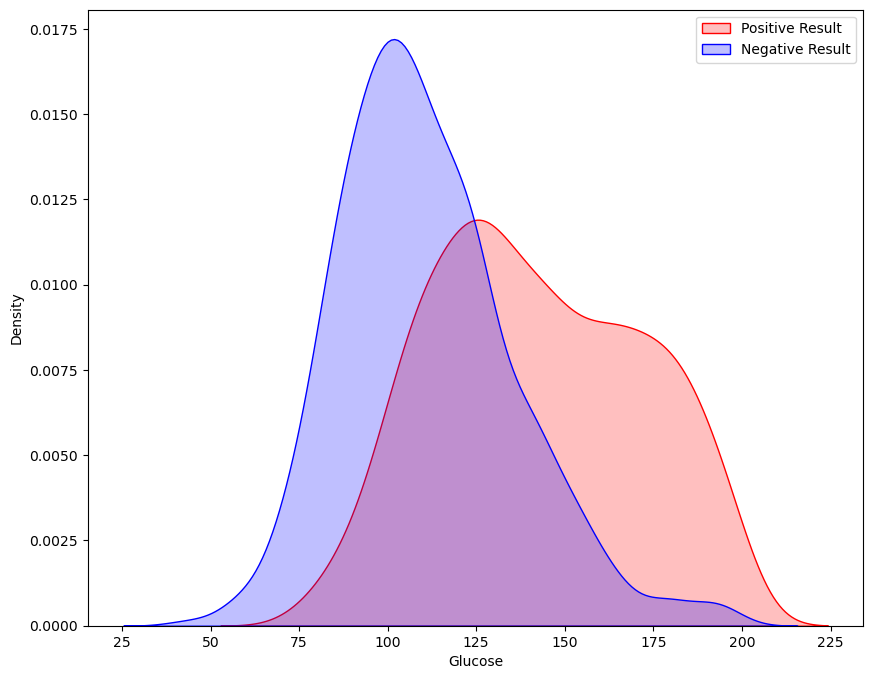

In [49]:
  
plt.figure(figsize = (10, 8))  
kde = sns.kdeplot(data["Glucose"][data["Outcome"] == 1], color = "Red", fill = True)  
kde = sns.kdeplot(data["Glucose"][data["Outcome"] == 0], ax = kde, color = "Blue", fill= True)  
kde.set_xlabel("Glucose")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result","Negative Result"])  

In [31]:
quartile  = QuantileTransformer()  
X = quartile.fit_transform(data)  
dataset = quartile.transform(X)  
dataset = pd.DataFrame(X)  
dataset.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']   
dataset.head() 

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747247,0.810310,0.494494,0.801802,0.380881,0.591592,0.750751,0.889389,1.0
1,0.232232,0.092092,0.289790,0.644144,0.380881,0.213714,0.476476,0.559059,0.0
2,0.863864,0.956957,0.233233,0.308809,0.380881,0.077578,0.782539,0.585085,1.0
3,0.232232,0.125125,0.289790,0.505005,0.662663,0.284916,0.106607,0.000000,0.0
4,0.000000,0.721722,0.005415,0.801802,0.833834,0.926927,0.996997,0.606607,1.0


In [53]:
X = data.drop(["Outcome"], axis = 1)  
Y = data["Outcome"]    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 10)    
print("The size of the training dataset: ", X_train.size)  
print("The size of the testing dataset: ", X_test.size)  

The size of the training dataset:  7376
The size of the testing dataset:  4920


In [39]:
def cv_model(models):  
    """ 
    We will create a list of machine learning models and print graphs of cross-validation scores with the help of mean accuracy. 
    """  
      
    # Cross validating the model using the Kfold stratified cross-validation method  
    k_fold = StratifiedKFold(n_splits = 15)  
      
    r = []  
    for m in models :  
        r.append(cross_val_score(estimator = m, X = X_train, y = Y_train, scoring = "accuracy", cv = k_fold, n_jobs = 4))  
  
    cross_val_means = []  
    cross_val_std = []  
    for result in r:  
        cross_val_means.append(result.mean())  
        cross_val_std.append(result.std())  
  
    df_result = pd.DataFrame({  
        "CrossValMean": cross_val_means,  
        "CrossValStd": cross_val_std,  
        "Model List":[  
            "DecisionTreeClassifier",  
            "LogisticRegression",  
            "SVC",  
            "AdaBoostClassifier",  
            "GradientBoostingClassifier",  
            "RandomForestClassifier",  
            "KNeighborsClassifier"  
        ]  
    })  
  
    # Generating the graph of cross-validation scores  
    bar_plot = sns.barplot(x = cross_val_means, y = df_result["Model List"].values, data = df_result)  
    bar_plot.set_xlabel("Mean of Cross Validation Accuracy Scores")  
    bar_plot.set_title("Cross Validation Scores of Models")  
    return df_result  

,CrossValMean,CrossValStd,Model List
0,0.874141,0.031848,DecisionTreeClassifier
1,0.761308,0.044333,LogisticRegression
2,0.761326,0.052179,SVC
3,0.878583,0.040571,AdaBoostClassifier
4,0.835184,0.031041,GradientBoostingClassifier
5,0.898079,0.038049,RandomForestClassifier
6,0.750608,0.064163,KNeighborsClassifier


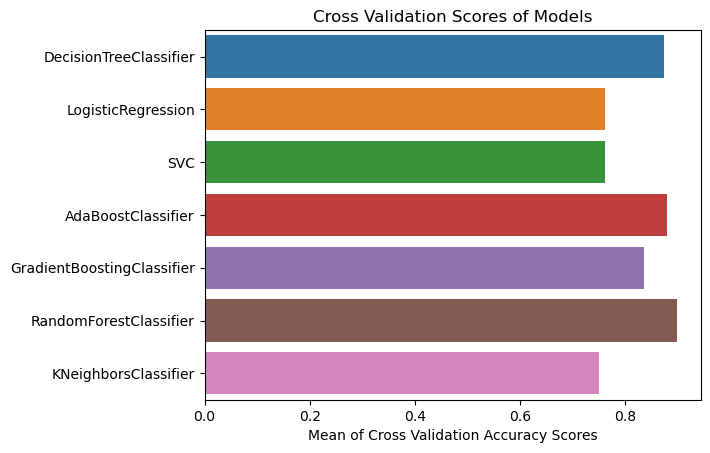

In [50]:
# Ensure you have split the dataset before calling cv_model

# Splitting the dataset into the training and testing dataset
X = data.drop(["Outcome"], axis=1)  # Features
Y = data["Outcome"]  # Labels

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=10)

# Updated cv_model function to accept X_train and Y_train
def cv_model(models, X_train, Y_train):  
    """ 
    We will create a list of machine learning models and print graphs of cross-validation scores 
    using the mean accuracy. 
    """  
      
    # Cross validating the model using the Kfold stratified cross-validation method  
    k_fold = StratifiedKFold(n_splits=15)  
      
    r = []  
    for m in models:  
        r.append(cross_val_score(estimator=m, X=X_train, y=Y_train, scoring="accuracy", cv=k_fold, n_jobs=4))  
  
    cross_val_means = []  
    cross_val_std = []  
    for result in r:  
        cross_val_means.append(result.mean())  
        cross_val_std.append(result.std())  
  
    df_result = pd.DataFrame({  
        "CrossValMean": cross_val_means,  
        "CrossValStd": cross_val_std,  
        "Model List": [  
            "DecisionTreeClassifier",  
            "LogisticRegression",  
            "SVC",  
            "AdaBoostClassifier",  
            "GradientBoostingClassifier",  
            "RandomForestClassifier",  
            "KNeighborsClassifier"  
        ]  
    })  
  
    # Generating the graph of cross-validation scores  
    bar_plot = sns.barplot(x=cross_val_means, y=df_result["Model List"].values, data=df_result)  
    bar_plot.set_xlabel("Mean of Cross Validation Accuracy Scores")  
    bar_plot.set_title("Cross Validation Scores of Models")  
    return df_result  

# Now call the updated cv_model function and pass X_train, Y_train
state = 20
models_list = [
    DecisionTreeClassifier(random_state=state),  
    LogisticRegression(random_state=state, solver='liblinear'),  
    SVC(random_state=state),  
    AdaBoostClassifier(DecisionTreeClassifier(random_state=state), random_state=state, learning_rate=0.3),  
    GradientBoostingClassifier(random_state=state),  
    RandomForestClassifier(random_state=state),  
    KNeighborsClassifier()
]

# Pass the train data to the function
cv_model(models_list, X_train, Y_train)


In [52]:
# Importing the required libraries  
from sklearn.metrics import classification_report  
from sklearn.model_selection import GridSearchCV  
  
# Defining a function to analyse the grid results  
def analyze_grid(grid):  
    ''''' 
    Analyzing the results of GridCV method and making predictions for the test data 
    Presenting the classification report at the end 
    '''      
    # Printing the best parameter and accuracy score  
    print("Tuned hyperparameters: ", grid.best_params_)  
    print("Accuracy Score:", grid.best_score_)  
      
    mean_values = grid.cv_results_["mean_test_score"]  
    std_values = grid.cv_results_["std_test_score"]  
    for m, s, p in zip(mean_values, std_values, grid.cv_results_["params"]):  
      print(f"Mean: {m}, Std: {s} * 2, Params: {p}")  
      print("The classification Report:")  
    Y_true, Y_pred = Y_test, grid.predict(X_test)  
    print(classification_report(Y_true, Y_pred))  
    print()  

In [54]:
# Defining the Logistic Regression model and its parameters  
model = LogisticRegression(solver ='liblinear')  
solver_list = ['liblinear']  
penalty_type = ['l2']  
c_values = [200, 100, 10, 1.0, 0.01]  
  
# Defining the grid search  
grid_lr = dict(solver = solver_list, penalty = penalty_type, C = c_values)  
cross_val = StratifiedKFold(n_splits = 100, random_state = 10, shuffle = True)  
grid_search_cv = GridSearchCV(estimator = model, param_grid = grid_lr, cv = cross_val, scoring = 'accuracy', error_score = 0)  
lr_result = grid_search_cv.fit(X_train, Y_train)  
  
# Result of Hyper Parameters of Logistic Regression  
analyze_grid(lr_result)  

Tuned hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score: 0.7687777777777778
Mean: 0.7676666666666666, Std: 0.13050798187595014 * 2, Params: {'C': 200, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7676666666666666, Std: 0.13050798187595014 * 2, Params: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7687777777777778, Std: 0.1262634420175668 * 2, Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7574444444444446, Std: 0.12761878997841797 * 2, Params: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.681, Std: 0.14841795339139027 * 2, Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       419
           1       0.64      0.63      0.64       196

    accuracy                   

In [56]:
# Defining the SVC model and its parameters  
  
# Defining the grid search  
svc = SVC()  
parameters = [  
    {"kernel": ["rbf"], "gamma": [1e-4], "C": [200, 100, 10, 1.0, 0.01]}  
]  
  
# Performing the cross-validation with tuned parameters  
cross_val = StratifiedKFold(n_splits = 3, random_state = 10, shuffle = True)  
  
# Performing the grid search  
grid = GridSearchCV(estimator = svc, param_grid = parameters, cv = cross_val, scoring = 'accuracy')  
  
# SVC Hyperparameter tuning result  
result = grid.fit(X_train, Y_train)  
  
analyze_grid(result)  

Tuned hyperparameters:  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy Score: 0.7635757293737749
Mean: 0.7602901984009476, Std: 0.011024950923247559 * 2, Params: {'C': 200, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.7602901984009476, Std: 0.009656898939366488 * 2, Params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.7635757293737749, Std: 0.011895291537368367 * 2, Params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.7635651536303002, Std: 0.006396826153611763 * 2, Params: {'C': 1.0, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.6312379260261997, Std: 0.0009671779372377837 * 2, Params: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       419
           1       0.66      0.61      0.63       196

    accuracy                           0.77    

In [58]:
# Defining the SVC model and its parameters  
  
# Defining the grid search  
rfc = RandomForestClassifier(random_state = 42)  
parameters = {   
    'n_estimators': [500],  
    'max_features': ['log2'],  
    'max_depth' : [4,5,6],  
    'criterion' :['entropy']  
}  
  
# Performing the cross-validation with tuned parameters  
cross_val = StratifiedKFold(n_splits = 3, random_state = 10, shuffle = True)  
  
# Performing the grid search  
grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = cross_val, scoring = 'accuracy')  
  
# SVC Hyperparameter Tuning Result  
result = grid.fit(X_train, Y_train)  
  
analyze_grid(result) 

Tuned hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}
Accuracy Score: 0.819955017837754
Mean: 0.7928247105771535, Std: 0.017285239496546773 * 2, Params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
Mean: 0.8004392458789852, Std: 0.012476426298966128 * 2, Params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
Mean: 0.819955017837754, Std: 0.006730142201562669 * 2, Params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       419
           1       0.70      0.79      0.74       196

    accuracy                           0.83       615
   macro avg       0.80      0.82      0.81       615
weighted avg       0.83      0.83      0.83       6

In [60]:
# Making the predictions  
Y_pred = lr_result.predict(X_test)  
print(classification_report(Y_test, Y_pred))  

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       419
           1       0.64      0.63      0.64       196

    accuracy                           0.77       615
   macro avg       0.74      0.73      0.73       615
weighted avg       0.77      0.77      0.77       615



In [62]:
X_test['predictions'] = Y_pred  
print(X_test)  

      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
1467            4      127             88      11.000000  155.000000  34.5   
524             3      125             58      20.539362   79.748211  31.6   
413             1      143             74      22.000000   61.000000  26.2   
244             2      146             76      35.000000  194.000000  38.2   
31              3      158             76      36.000000  245.000000  31.6   
...           ...      ...            ...            ...         ...   ...   
1343            1      143             86      30.000000  330.000000  30.1   
1302            6       91             72      20.539362   79.748211  29.8   
287             1      119             86      39.000000  220.000000  45.6   
335             0      165             76      43.000000  255.000000  47.9   
658            11      127            106      20.539362   79.748211  39.0   

      DiabetesPedigreeFunction  Age  predictions  
1467        